In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import norm, pearsonr
import math
import pandas as pd
from statsmodels.graphics.gofplots import qqplot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#**Task1**

In [ ]:
# read the csv file
df = pd.read_csv('https://raw.githubusercontent.com/rishiraj-cs/Datasets-tutorial-Lab3/main/Automobile_data.csv')
# print the first 5 rows of the data set
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
df.replace('?',np.NaN, inplace = True)
df.dropna(inplace = True)

#Q1

In [ ]:
df_temp = df[['bore', 'stroke', 'compression-ratio', 'horsepower']]
df_temp = df_temp.apply(pd.to_numeric)

In [ ]:
df_temp.dtypes

bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
dtype: object

In [ ]:
df_temp.corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.102581,0.015119,0.560239
stroke,-0.102581,1.000000,0.243587,0.148804
compression-ratio,0.015119,0.243587,1.000000,-0.162305
horsepower,0.560239,0.148804,-0.162305,1.000000


Text(0, 0.5, 'Stroke')

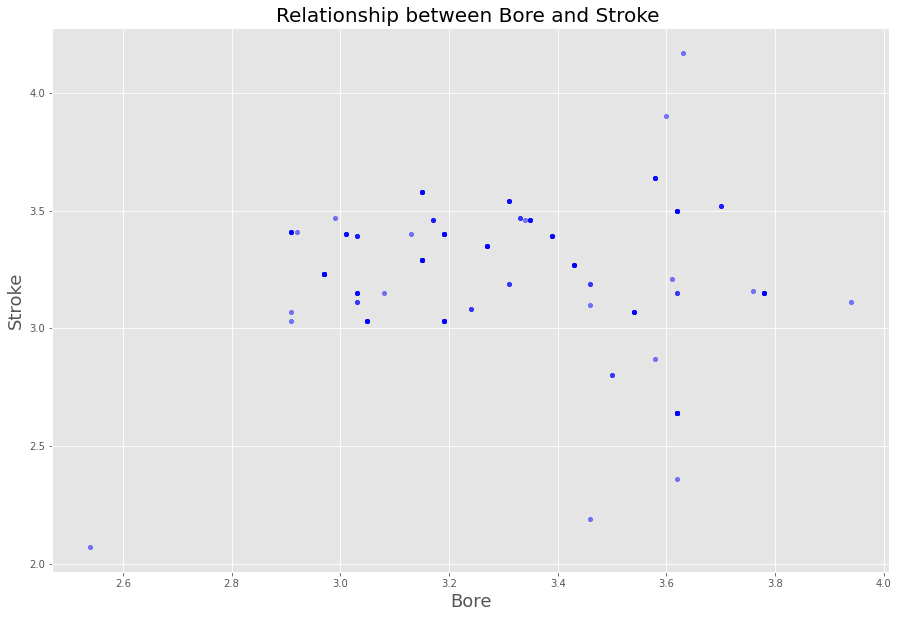

In [ ]:
axl = df_temp.plot(kind='scatter', x='bore', y='stroke', color='blue', alpha=0.5, figsize=(15, 10))
plt.title('Relationship between Bore and Stroke ', size=20)
plt.xlabel('Bore', size=18)
plt.ylabel('Stroke', size=18)

Text(0, 0.5, 'compression-ratio')

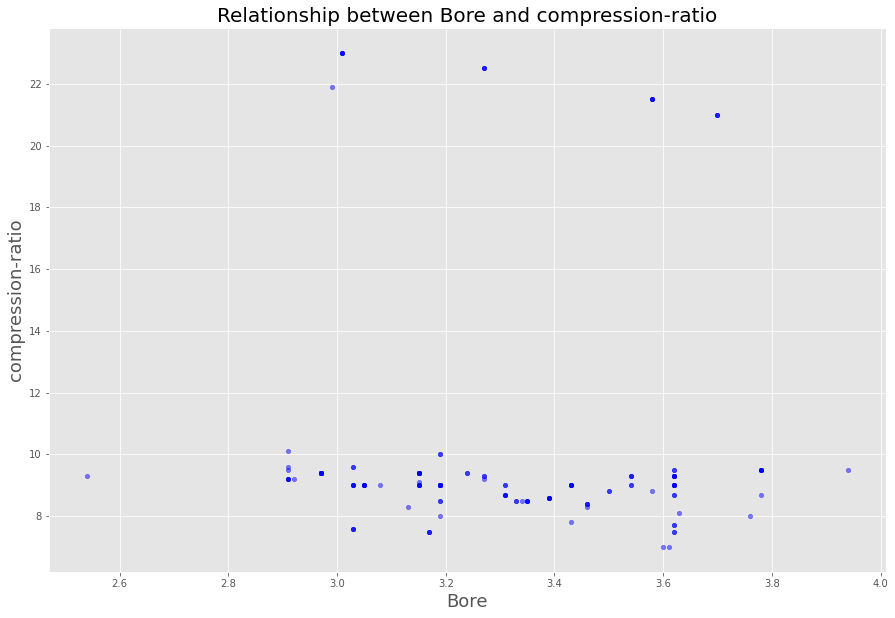

In [ ]:
axl = df_temp.plot(kind='scatter', x='bore', y='compression-ratio', color='blue', alpha=0.5, figsize=(15, 10))
plt.title('Relationship between Bore and compression-ratio', size=20)
plt.xlabel('Bore', size=18)
plt.ylabel('compression-ratio', size=18)

Text(0, 0.5, 'horsepower')

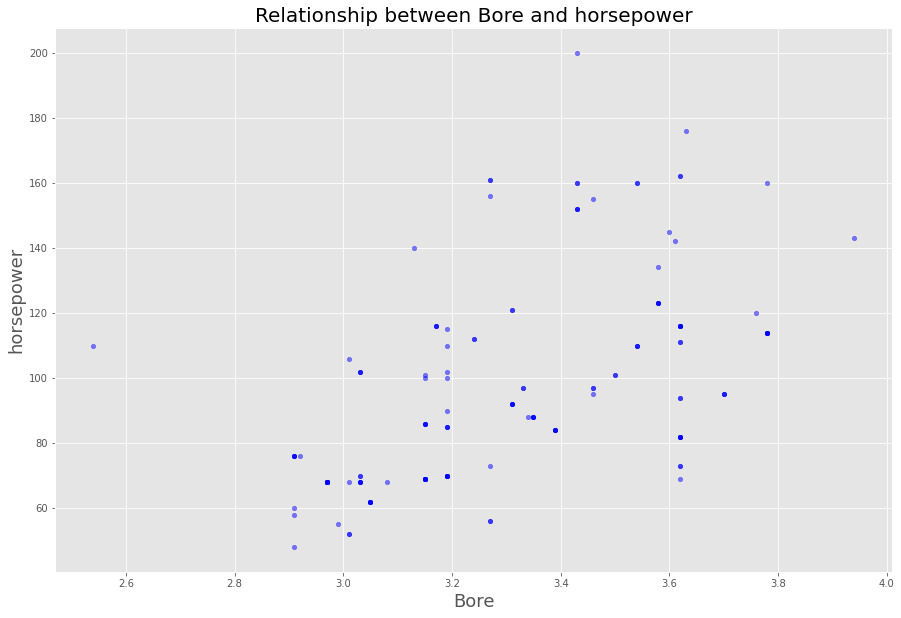

In [ ]:
axl = df_temp.plot(kind='scatter', x='bore', y='horsepower', color='blue', alpha=0.5, figsize=(15, 10))
plt.title('Relationship between Bore and horsepower', size=20)
plt.xlabel('Bore', size=18)
plt.ylabel('horsepower', size=18)

Text(0, 0.5, 'horsepower')

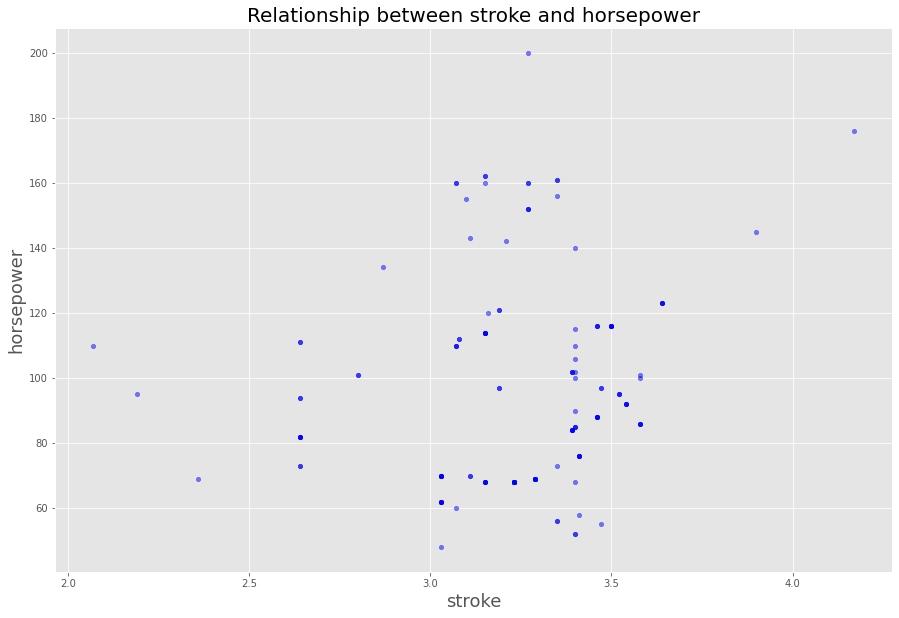

In [ ]:
axl = df_temp.plot(kind='scatter', x='stroke', y='horsepower', color='blue', alpha=0.5, figsize=(15, 10))
plt.title('Relationship between stroke and horsepower', size=20)
plt.xlabel('stroke', size=18)
plt.ylabel('horsepower', size=18)

Text(0, 0.5, 'compression-ratio')

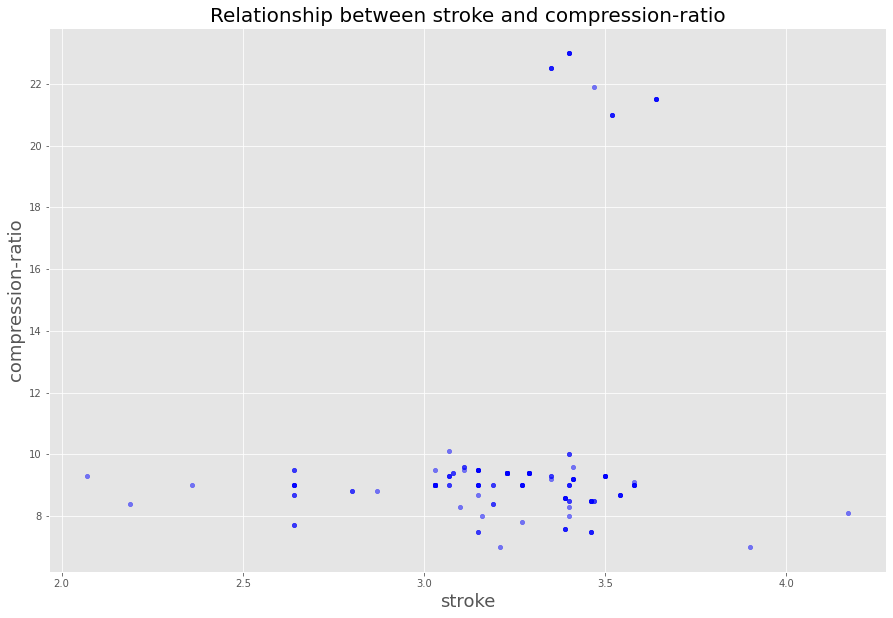

In [ ]:
axl = df_temp.plot(kind='scatter', x='stroke', y='compression-ratio', color='blue', alpha=0.5, figsize=(15, 10))
plt.title('Relationship between stroke and compression-ratio', size=20)
plt.xlabel('stroke', size=18)
plt.ylabel('compression-ratio', size=18)

Text(0, 0.5, 'horsepower')

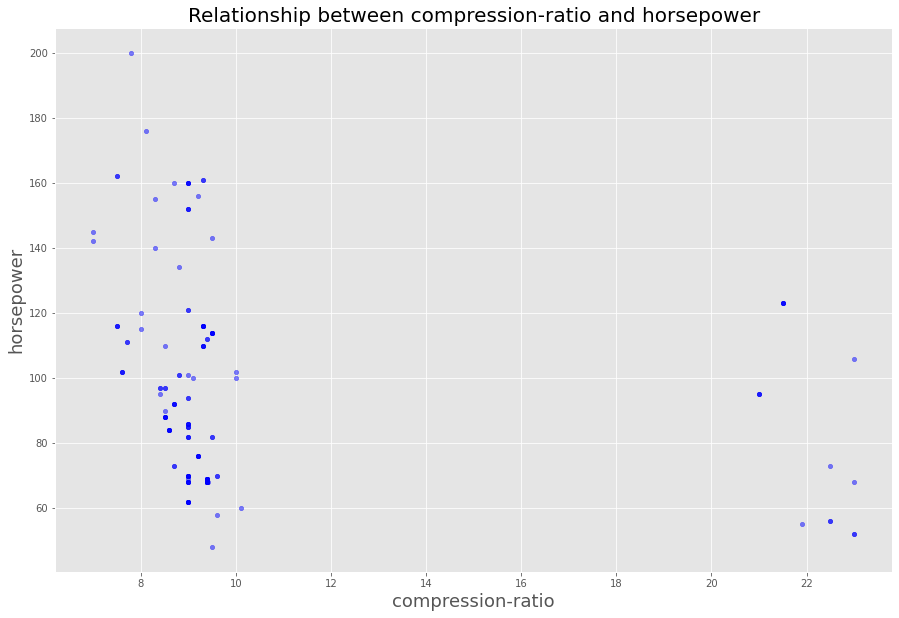

In [ ]:
axl = df_temp.plot(kind='scatter', x='compression-ratio', y='horsepower', color='blue', alpha=0.5, figsize=(15, 10))
plt.title('Relationship between compression-ratio and horsepower', size=20)
plt.xlabel('compression-ratio', size=18)
plt.ylabel('horsepower', size=18)

#Q2

In [ ]:
df_temp = df[['wheel-base', 'stroke', 'price']]
df_temp = df_temp.apply(pd.to_numeric)

In [ ]:
#Correlation between Stroke and Price
corr = df_temp['stroke'].corr(df_temp['price'])
print(f'Correlation Coefficient between Stroke and Price = {corr}')

Correlation Coefficient between Stroke and Price = 0.16066434143610164


Text(0, 0.5, 'Price')

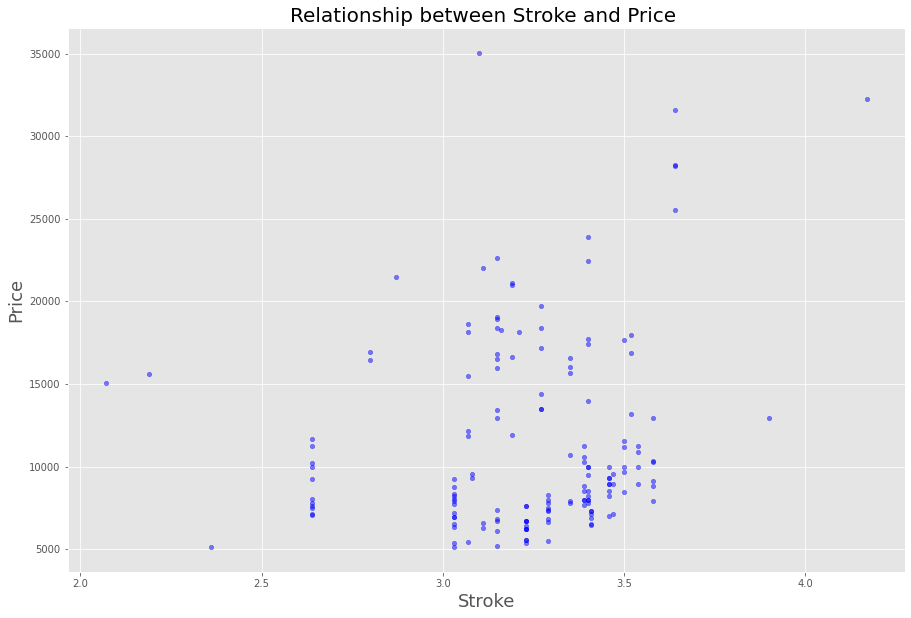

In [ ]:
# Scatter Plot of Price and Stroke

axl = df_temp.plot(kind='scatter', x='stroke', y='price', color='blue', alpha=0.5, figsize=(15, 10))
plt.title('Relationship between Stroke and Price ', size=20)
plt.xlabel('Stroke', size=18)
plt.ylabel('Price', size=18)

#Q3

In [ ]:
corr,p_value=pearsonr(df_temp['wheel-base'], df_temp['price'])
print(f'Pearsons correlation: {corr} and p-value is: {p_value}')

Pearsons correlation: 0.7344189369206997 and p-value is: 3.221918254220027e-28


#Q4

Text(0, 0.5, 'Price')

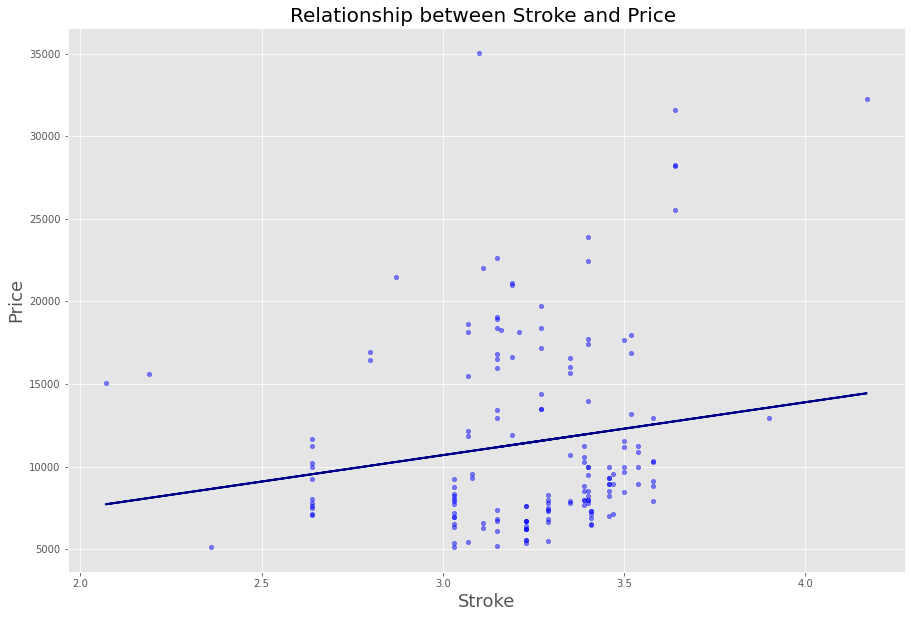

In [ ]:
axl = df_temp.plot(kind='scatter', x='stroke', y='price', color='blue', alpha=0.5, figsize=(15, 10))
plt.title('Relationship between Stroke and Price ', size=20)
linear = np.polyfit(df_temp.stroke, df_temp.price, 1)
plt.plot(df_temp.stroke, linear[0] * df_temp.stroke + linear[1], color='darkblue', linewidth=2)
#plt.text(65, 230, 'y={:.2f}+{:.2f}*x'.format(linear[1], linear[0]), color='darkblue', size=12)
plt.xlabel('Stroke', size=18)
plt.ylabel('Price', size=18)

#Q5

In [ ]:
df_temp = df[['bore', 'stroke', 'compression-ratio', 'horsepower', 'city-mpg', 'price']]
df_temp = df_temp.apply(pd.to_numeric)

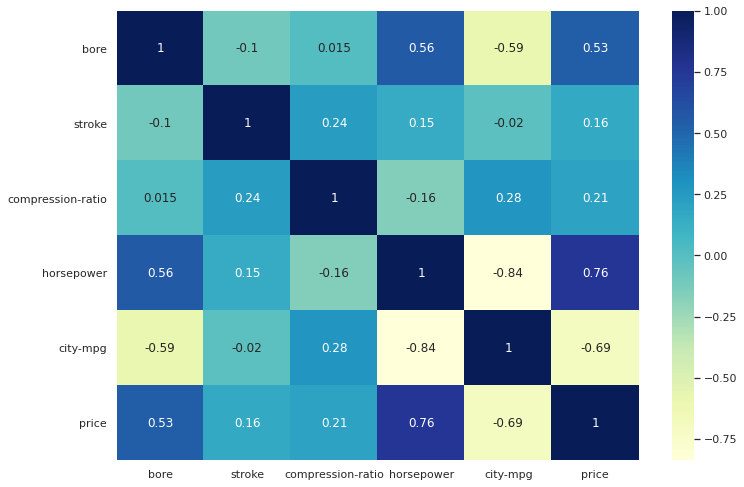

In [ ]:
import seaborn as sns
sns.set_theme(color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
dataplot = sns.heatmap(df_temp.corr(), cmap="YlGnBu", annot=True)
# displaying heatmap
plt.show()

#**Task2**

In [ ]:
df_stocks=pd.read_csv("https://raw.githubusercontent.com/rishiraj-cs/Datasets-tutorial-Lab3/main/stocks.csv", index_col=0)
df_bonds=pd.read_csv("https://raw.githubusercontent.com/rishiraj-cs/Datasets-tutorial-Lab3/main/bonds.csv",index_col=0)

#Q1

In [ ]:
df_merge = df_stocks.merge(df_bonds, left_index = True, right_index=True, how = 'inner')
df_merge

,SP500,US10Y
observation_date,,
2007-06-11,1509.12,5.14
2007-06-12,1493.00,5.26
2007-06-13,1515.67,5.20
2007-06-14,1522.97,5.23
2007-06-15,1532.91,5.16
...,...,...
2017-06-02,2439.07,2.15
2017-06-05,2436.10,2.18
2017-06-06,2429.33,2.14


#Q2

In [ ]:
# Compute percent change using pct_change()
returns = df_merge.pct_change()

# Compute correlation using corr()
correlation = returns['SP500'].corr(returns['US10Y'])
print("Correlation of stocks and bonds: ", correlation)

Correlation of stocks and bonds:  0.4119448886249272


#Q3

Text(0, 0.5, 'Bonds')

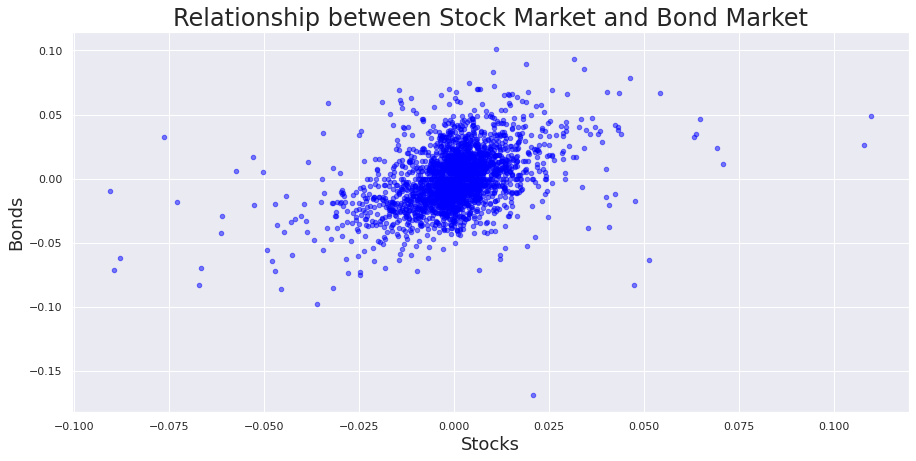

In [ ]:
# Scatter plot of Height and Weight

ax1 = returns.plot(kind='scatter', x='SP500', y='US10Y', color='blue', alpha=0.5, figsize=(15, 7))
plt.title('Relationship between Stock Market and Bond Market', size=24)
plt.xlabel('Stocks', size=18)
plt.ylabel('Bonds', size=18)

#**Task3**

In [ ]:
import pandas as pd
import numpy as np
# read the csv file
df = pd.read_csv('https://raw.githubusercontent.com/rishiraj-cs/Datasets-tutorial-Lab3/main/numberline.csv')

# print the first 5 rows of the data set
df.head()

,true_value,second_graders_guess,fourth_graders_guess
0,5,98.485,37.879
1,20,223.485,75.758
2,27,242.424,68.182
3,55,295.455,113.636
4,80,306.818,151.515


#Q1

Text(0, 0.5, 'fourth_graders_guess')

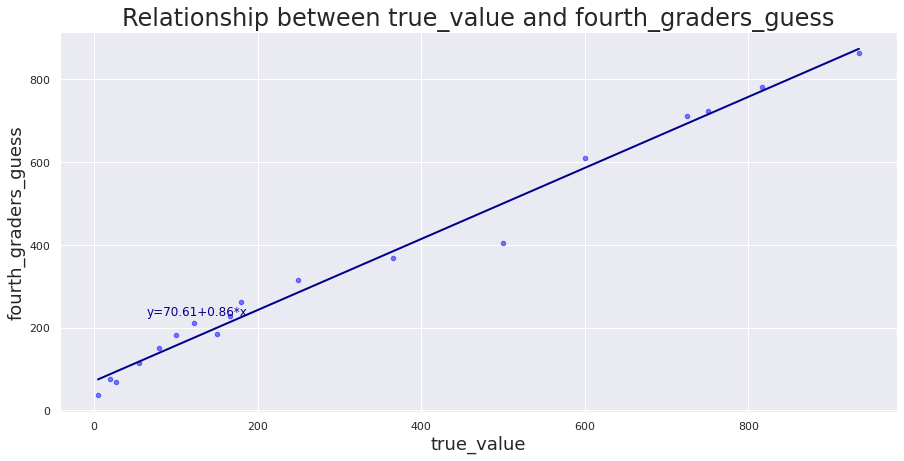

In [ ]:
# Scatter plot of Height and Weight

ax1 = df.plot(kind='scatter', x='true_value', y='fourth_graders_guess', color='blue', alpha=0.5, figsize=(15, 7))
linear = np.polyfit(df.true_value, df.fourth_graders_guess, 1)
plt.title('Relationship between true_value and fourth_graders_guess', size=24)
plt.plot(df.true_value, linear[0] * df.true_value + linear[1], color='darkblue', linewidth=2)
plt.text(65, 230, 'y={:.2f}+{:.2f}*x'.format(linear[1], linear[0]), color='darkblue', size=12)
plt.xlabel('true_value', size=18)
plt.ylabel('fourth_graders_guess', size=18)

#Q2

Text(0, 0.5, 'second_graders_guess')

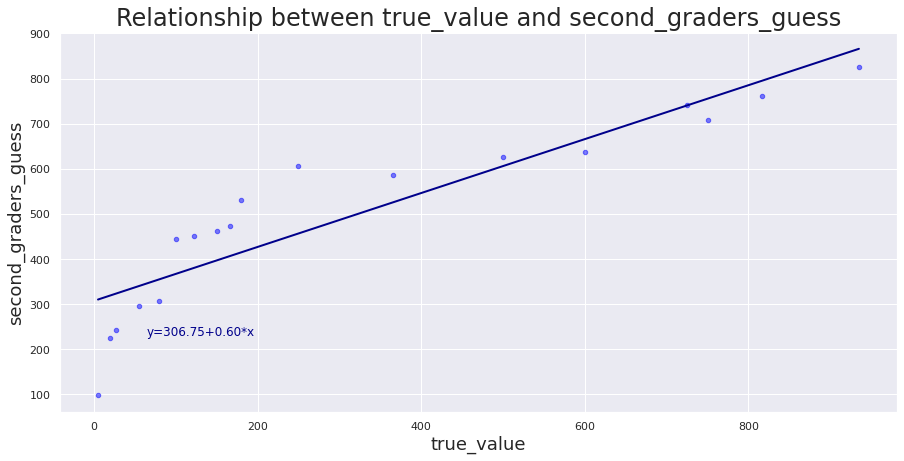

In [ ]:
# Scatter plot of Height and Weight

ax1 = df.plot(kind='scatter', x='true_value', y='second_graders_guess', color='blue', alpha=0.5, figsize=(15, 7))
linear = np.polyfit(df.true_value, df.second_graders_guess, 1)
plt.title('Relationship between true_value and second_graders_guess', size=24)
plt.plot(df.true_value, linear[0] * df.true_value + linear[1], color='darkblue', linewidth=2)
plt.text(65, 230, 'y={:.2f}+{:.2f}*x'.format(linear[1], linear[0]), color='darkblue', size=12)
plt.xlabel('true_value', size=18)
plt.ylabel('second_graders_guess', size=18)

In [ ]:
from math import log
def log_value(x):
  return log(x)
df['log_value'] = df['true_value'].apply(log_value)

Text(0, 0.5, 'second_graders_guess')

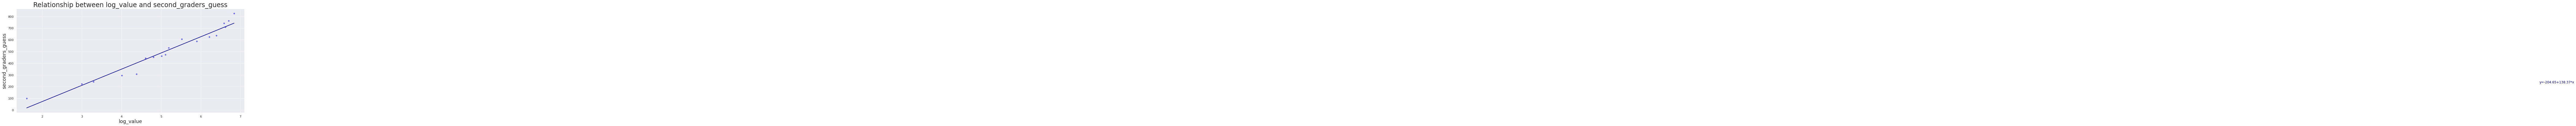

In [ ]:
# Scatter plot of Height and Weight

ax1 = df.plot(kind='scatter', x='log_value', y='second_graders_guess', color='blue', alpha=0.5, figsize=(15, 7))
linear = np.polyfit(df.log_value, df.second_graders_guess, 1)
plt.title('Relationship between log_value and second_graders_guess', size=24)
plt.plot(df.log_value, linear[0] * df.log_value + linear[1], color='darkblue', linewidth=2)
plt.text(65, 230, 'y={:.2f}+{:.2f}*x'.format(linear[1], linear[0]), color='darkblue', size=12)
plt.xlabel('log_value', size=18)
plt.ylabel('second_graders_guess', size=18)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'second_graders_guess')

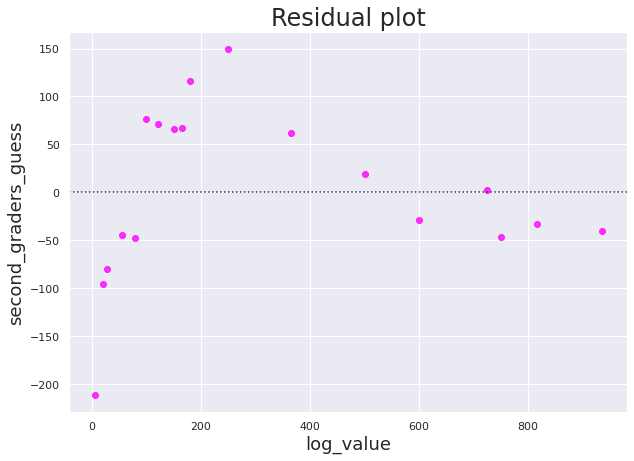

In [ ]:
import seaborn as sns

# residual plot 500 females
fig = plt.figure(figsize = (10, 7))
sns.residplot(df.true_value, df.second_graders_guess, color='magenta')

# title and labels
plt.title('Residual plot', size=24)
plt.xlabel('log_value', size=18)
plt.ylabel('second_graders_guess', size=18)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'second_graders_guess')

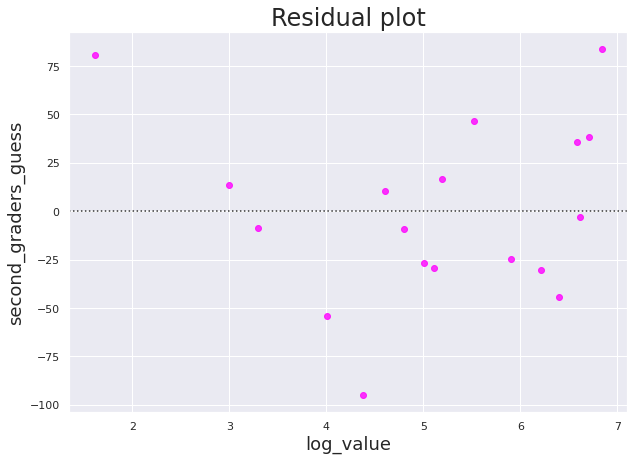

In [ ]:
import seaborn as sns

# residual plot 500 females
fig = plt.figure(figsize = (10, 7))
sns.residplot(df.log_value, df.second_graders_guess, color='magenta')

# title and labels
plt.title('Residual plot', size=24)
plt.xlabel('log_value', size=18)
plt.ylabel('second_graders_guess', size=18)

#**Task3 Q3** Explain the Residual Plot in 2-3 lines

#**Task 4**

In [ ]:
# read the csv file
df1 = pd.read_csv('https://raw.githubusercontent.com/rishiraj-cs/Datasets-tutorial-Lab3/main/ADANIPORTS.csv')
df2 = pd.read_csv("https://raw.githubusercontent.com/rishiraj-cs/Datasets-tutorial-Lab3/main/CIPLA.csv")
df3 = pd.read_csv("https://raw.githubusercontent.com/rishiraj-cs/Datasets-tutorial-Lab3/main/HDFCBANK.csv")
df4 = pd.read_csv("https://raw.githubusercontent.com/rishiraj-cs/Datasets-tutorial-Lab3/main/MARUTI.csv")
df5 = pd.read_csv("https://raw.githubusercontent.com/rishiraj-cs/Datasets-tutorial-Lab3/main/NTPC.csv")
df6 = pd.read_csv("https://raw.githubusercontent.com/rishiraj-cs/Datasets-tutorial-Lab3/main/TATAMOTORS.csv")

In [ ]:
df1.drop(columns = ['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble'], inplace = True)
df2.drop(columns = ['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble'], inplace = True)
df3.drop(columns = ['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble'], inplace = True)
df4.drop(columns = ['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble'], inplace = True)
df5.drop(columns = ['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble'], inplace = True)
df6.drop(columns = ['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble'], inplace = True)

In [ ]:
#Set Date Column as Index
df1.set_index('Date', inplace = True)
df2.set_index('Date', inplace = True)
df3.set_index('Date', inplace = True)
df4.set_index('Date', inplace = True)
df5.set_index('Date', inplace = True)
df6.set_index('Date', inplace = True)

In [ ]:
#Renaming Columns before merging
df1.columns = ['ADANIPORTS-close', 'ADANIPORTS-VWAP']
df2.columns = ['CIPLA-close', 'CIPLA-VWAP']
df3.columns = ['HDFC-close', 'HDFC-VWAP']
df4.columns = ['MARUTI-close', 'MARUTI-VWAP']
df5.columns = ['NTPC-close', 'NTPC-VWAP']
df6.columns = ['TATAMOTORS-close', 'TATAMOTORS-VWAP']

In [ ]:
#Drop Duplicates
df1.drop_duplicates(inplace = True)
df2.drop_duplicates(inplace = True)
df3.drop_duplicates(inplace = True)
df4.drop_duplicates(inplace = True)
df5.drop_duplicates(inplace = True)
df6.drop_duplicates(inplace = True)

In [ ]:
df = df1.merge(df2, left_index = True, right_index=True, how = 'inner')
df = df.merge(df3, left_index = True, right_index=True, how = 'inner')
df = df.merge(df4, left_index = True, right_index=True, how = 'inner')
df = df.merge(df5, left_index = True, right_index=True, how = 'inner')
df = df.merge(df6, left_index = True, right_index=True, how = 'inner')

In [ ]:
df.head()

,ADANIPORTS-close,ADANIPORTS-VWAP,CIPLA-close,CIPLA-VWAP,HDFC-close,HDFC-VWAP,MARUTI-close,MARUTI-VWAP,NTPC-close,NTPC-VWAP,TATAMOTORS-close,TATAMOTORS-VWAP
Date,,,,,,,,,,,,
2007-11-27,962.90,984.72,183.60,183.43,1632.65,1623.27,937.45,935.87,235.00,234.97,719.75,715.46
2007-11-28,893.90,941.38,182.85,183.37,1606.35,1623.35,967.50,961.47,230.85,237.20,721.25,720.69
2007-11-29,884.20,888.09,182.00,182.35,1674.40,1678.97,990.10,996.00,231.25,231.90,718.20,727.07
2007-11-30,921.55,929.17,183.10,183.44,1716.15,1717.84,1014.15,1012.66,236.65,235.56,732.45,732.04
2007-12-03,969.30,965.65,185.25,185.31,1696.10,1696.50,1032.85,1036.38,240.20,240.88,736.15,741.00


#Q1

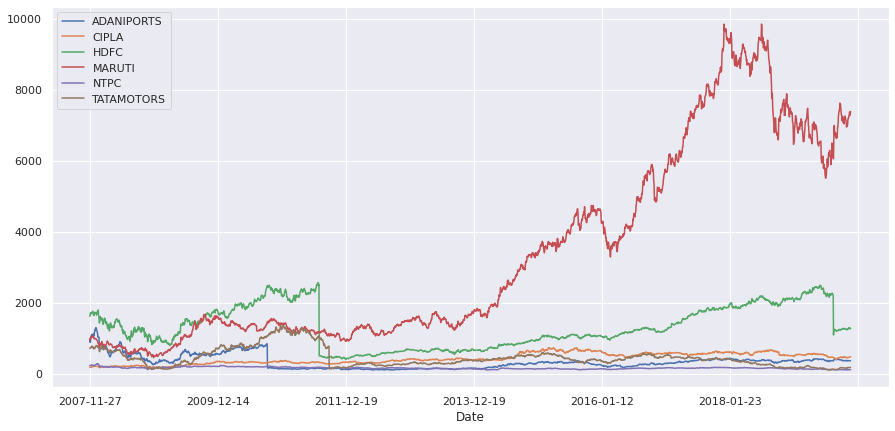

In [ ]:
df['ADANIPORTS-VWAP'].plot(label = "ADANIPORTS", figsize = (15,7))
df['CIPLA-VWAP'].plot(label = "CIPLA", figsize = (15,7))
df['HDFC-VWAP'].plot(label = "HDFC", figsize = (15,7))
df['MARUTI-VWAP'].plot(label = "MARUTI", figsize = (15,7))
df['NTPC-VWAP'].plot(label = "NTPC", figsize = (15,7))
df['TATAMOTORS-VWAP'].plot(label = "TATAMOTORS", figsize = (15,7))
plt.legend()

In [ ]:
df_close = df.drop(columns = ['ADANIPORTS-VWAP', 'CIPLA-VWAP', 'HDFC-VWAP', 'MARUTI-VWAP', 'NTPC-VWAP', 'TATAMOTORS-VWAP'])

In [ ]:
df_close.dtypes

ADANIPORTS-close    float64
CIPLA-close         float64
HDFC-close          float64
MARUTI-close        float64
NTPC-close          float64
TATAMOTORS-close    float64
dtype: object

#Q2

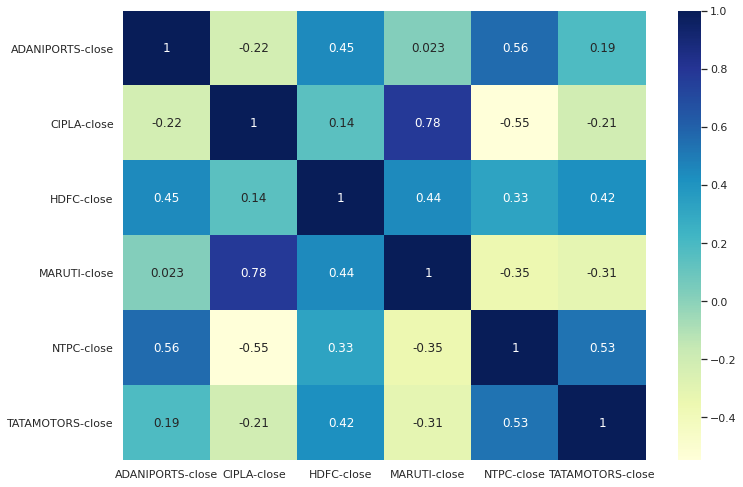

In [ ]:
import seaborn as sns
sns.set_theme(color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
dataplot = sns.heatmap(df_close.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()